# **Setup**

In [1]:
%pip install pythainlp
%pip install tensorflow
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# Import Library
---

In [2]:
from tensorflow import keras

import pandas as pd
import numpy as np
import copy
from pythainlp import word_tokenize
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences

from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics

from keras.layers import LSTM, Embedding, Dense, Bidirectional
from keras.models import Sequential
from keras.losses import CategoricalCrossentropy
from keras.optimizers import Adam

---
### Prepare Data {Tokenize Word}
---

In [3]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']  # Change 'acc' to 'accuracy'
    val_acc = history.history['val_accuracy']  # Change 'val_acc' to 'val_accuracy'
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()


In [4]:
def plot_confusion_metrix(cm) :
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
    cm_display.plot(cmap=plt.cm.Blues, xticks_rotation=45)

    plt.show()

In [5]:
data = pd.read_csv("NLP_Elder_Companion.csv")
text = np.array(data["Text"].apply(word_tokenize, engine="newmm", keep_whitespace=False).values)
_class = np.array(data["Class"].values)

words_list = {}
max_len_sentence = 0
i = 1

for sentence in text:
    if max_len_sentence < len(sentence) :
        max_len_sentence = len(sentence)

    for word in sentence:
        if words_list.get(word) == None:
            words_list[word] = i
            i += 1

max_vocab = len(words_list)
word_sequence = copy.deepcopy(text)

for i in range(len(word_sequence)) :
    for j in range(len(word_sequence[i])) :
        word_sequence[i][j] = words_list[text[i][j]] 

x = pad_sequences(word_sequence, maxlen=max_len_sentence, padding='post')
y = to_categorical(_class, num_classes=9)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=7)

Epoch 1/20
6/6 [==============================] - 6s 700ms/step - loss: 2.1906 - accuracy: 0.1022 - val_loss: 2.1332 - val_accuracy: 0.2418
Epoch 2/20
6/6 [==============================] - 3s 552ms/step - loss: 2.0754 - accuracy: 0.3260 - val_loss: 1.9969 - val_accuracy: 0.3956
Epoch 3/20
6/6 [==============================] - 3s 527ms/step - loss: 1.9217 - accuracy: 0.3453 - val_loss: 1.7900 - val_accuracy: 0.4396
Epoch 4/20
6/6 [==============================] - 3s 551ms/step - loss: 1.5753 - accuracy: 0.5746 - val_loss: 1.4365 - val_accuracy: 0.5385
Epoch 5/20
6/6 [==============================] - 3s 562ms/step - loss: 1.2184 - accuracy: 0.6602 - val_loss: 1.0246 - val_accuracy: 0.6374
Epoch 6/20
6/6 [==============================] - 3s 554ms/step - loss: 0.7433 - accuracy: 0.8149 - val_loss: 0.8441 - val_accuracy: 0.7143
Epoch 7/20
6/6 [==============================] - 3s 560ms/step - loss: 0.4777 - accuracy: 0.8702 - val_loss: 0.7477 - val_accuracy: 0.7582
Epoch 8/20
6/6 [====

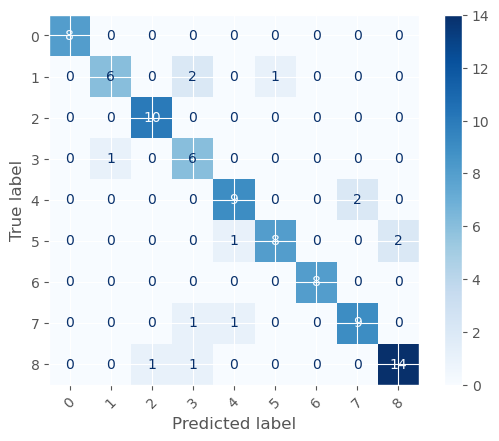


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.86      0.67      0.75         9
           2       0.91      1.00      0.95        10
           3       0.60      0.86      0.71         7
           4       0.82      0.82      0.82        11
           5       0.89      0.73      0.80        11
           6       1.00      1.00      1.00         8
           7       0.82      0.82      0.82        11
           8       0.88      0.88      0.88        16

    accuracy                           0.86        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.87      0.86      0.86        91



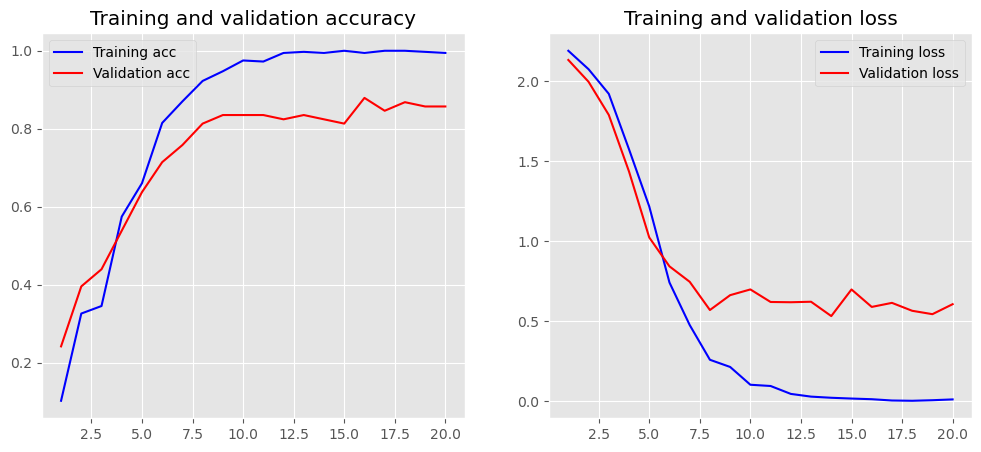

In [6]:
model = Sequential()
model.add(Embedding(input_dim=max_vocab + 1,
                    output_dim=500,
                    input_length=max_len_sentence))
model.add(Bidirectional(LSTM(500)))
model.add(Dense(9, activation="softmax"))

lost_func = CategoricalCrossentropy()
otm = Adam(learning_rate=0.00091)
model.compile(optimizer=otm, loss=lost_func, metrics=["accuracy"])
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=64, epochs=20, verbose=1)

y_predict = model.predict(x_test)
print(model.evaluate(x_test, y_test, verbose=1))
y_predict = np.argmax(y_predict, axis=1)
cm = confusion_matrix(np.argmax(y_test, axis=1), y_predict)
report = classification_report(np.argmax(y_test, axis=1), y_predict)
print("Confusion Matrix:")
plot_confusion_metrix(cm)

print("\nClassification Report:")
print(report)

plot_history(history)

In [7]:
input_word = "หิวมากแนะนำอะไรให้กินน่อย"

input_sequence = word_tokenize(input_word, engine="newmm", keep_whitespace=False)

for i in range(len(input_sequence)) :
    if words_list.get(input_sequence[i]) != None :
        input_sequence[i] = words_list[input_sequence[i]]
    else :
        input_sequence[i] = 0

input_sequence = np.array([input_sequence])

input_data = pad_sequences(input_sequence, maxlen=max_len_sentence, padding='post')
logit = model.predict(input_data, batch_size=32)
predict = [pred for pred in np.argmax(logit,axis=1)][0]
print(predict)

1/1 [==============================] - 0s 21ms/step
3


# LSTM

Epoch 1/25
6/6 [==============================] - 9s 650ms/step - loss: 2.1988 - accuracy: 0.1022 - val_loss: 2.1931 - val_accuracy: 0.1209
Epoch 2/25
6/6 [==============================] - 2s 307ms/step - loss: 2.1727 - accuracy: 0.1464 - val_loss: 2.1321 - val_accuracy: 0.1648
Epoch 3/25
6/6 [==============================] - 2s 280ms/step - loss: 2.0389 - accuracy: 0.2155 - val_loss: 1.8064 - val_accuracy: 0.2198
Epoch 4/25
6/6 [==============================] - 2s 293ms/step - loss: 1.8356 - accuracy: 0.2541 - val_loss: 1.7272 - val_accuracy: 0.2198
Epoch 5/25
6/6 [==============================] - 2s 292ms/step - loss: 1.6853 - accuracy: 0.3066 - val_loss: 1.5967 - val_accuracy: 0.3297
Epoch 6/25
6/6 [==============================] - 2s 311ms/step - loss: 1.4862 - accuracy: 0.3674 - val_loss: 1.4529 - val_accuracy: 0.3846
Epoch 7/25
6/6 [==============================] - 2s 259ms/step - loss: 1.2044 - accuracy: 0.5166 - val_loss: 1.2030 - val_accuracy: 0.4725
Epoch 8/25
6/6 [====

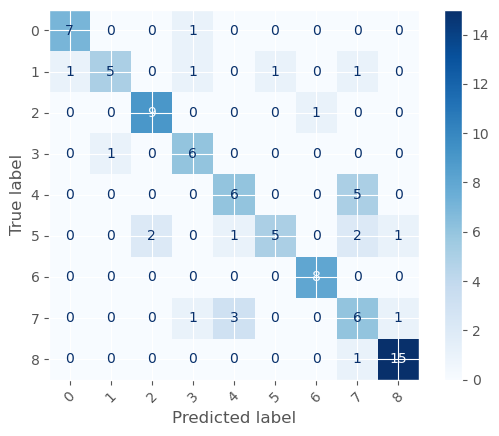


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.83      0.56      0.67         9
           2       0.82      0.90      0.86        10
           3       0.67      0.86      0.75         7
           4       0.60      0.55      0.57        11
           5       0.83      0.45      0.59        11
           6       0.89      1.00      0.94         8
           7       0.40      0.55      0.46        11
           8       0.88      0.94      0.91        16

    accuracy                           0.74        91
   macro avg       0.76      0.74      0.74        91
weighted avg       0.76      0.74      0.73        91



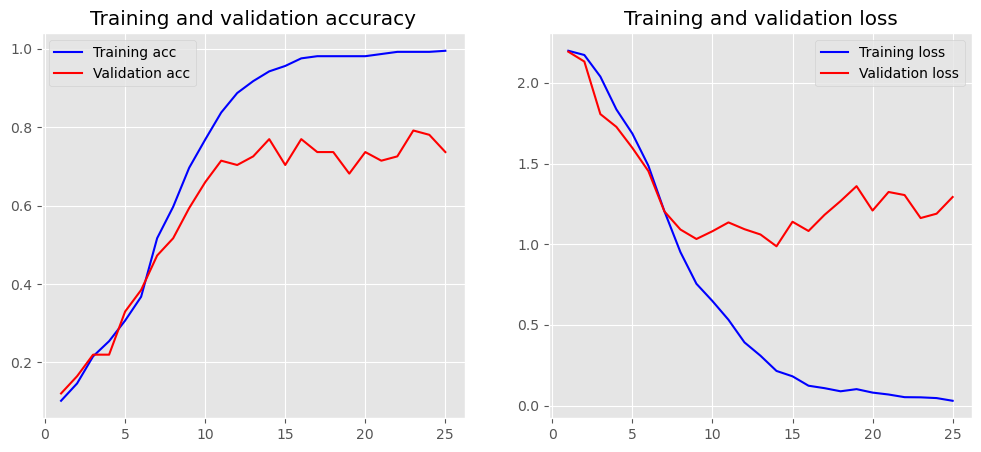

In [46]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.optimizers import Adam

# Create an LSTM model
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=max_vocab + 1, output_dim=300, input_length=max_len_sentence))
lstm_model.add(LSTM(128, return_sequences=True))
lstm_model.add(LSTM(128))
lstm_model.add(Dense(9, activation="softmax"))

# Compile the model
lstm_model.compile(optimizer=Adam(learning_rate=0.00091), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_lstm = lstm_model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=64, epochs=25, verbose=1)

y_predict = lstm_model.predict(x_test)
print(lstm_model.evaluate(x_test, y_test, verbose=1))
y_predict = np.argmax(y_predict, axis=1)
cm = confusion_matrix(np.argmax(y_test, axis=1), y_predict)
report = classification_report(np.argmax(y_test, axis=1), y_predict)
print("Confusion Matrix:")
plot_confusion_metrix(cm)

print("\nClassification Report:")
print(report)

plot_history(history_lstm)

# CNN 

Epoch 1/20
23/23 [==============================] - 1s 21ms/step - loss: 2.1889 - accuracy: 0.1243 - val_loss: 2.1678 - val_accuracy: 0.1978
Epoch 2/20
23/23 [==============================] - 0s 13ms/step - loss: 2.0718 - accuracy: 0.3287 - val_loss: 2.0051 - val_accuracy: 0.2967
Epoch 3/20
23/23 [==============================] - 0s 11ms/step - loss: 1.6859 - accuracy: 0.4558 - val_loss: 1.4685 - val_accuracy: 0.5934
Epoch 4/20
23/23 [==============================] - 0s 13ms/step - loss: 1.0094 - accuracy: 0.7652 - val_loss: 0.8854 - val_accuracy: 0.7582
Epoch 5/20
23/23 [==============================] - 0s 11ms/step - loss: 0.4729 - accuracy: 0.8978 - val_loss: 0.5969 - val_accuracy: 0.8352
Epoch 6/20
23/23 [==============================] - 0s 12ms/step - loss: 0.2120 - accuracy: 0.9641 - val_loss: 0.4826 - val_accuracy: 0.8462
Epoch 7/20
23/23 [==============================] - 0s 12ms/step - loss: 0.1024 - accuracy: 0.9807 - val_loss: 0.3835 - val_accuracy: 0.8681
Epoch 8/20
23

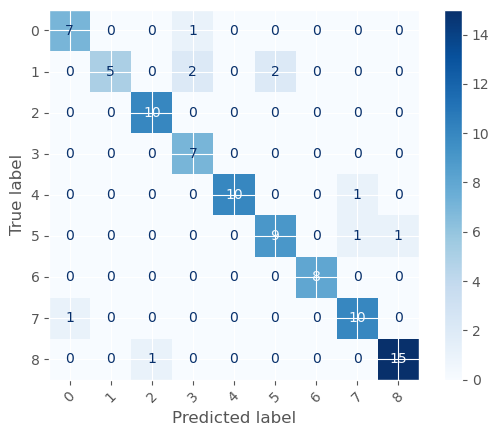


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       1.00      0.56      0.71         9
           2       0.91      1.00      0.95        10
           3       0.70      1.00      0.82         7
           4       1.00      0.91      0.95        11
           5       0.82      0.82      0.82        11
           6       1.00      1.00      1.00         8
           7       0.83      0.91      0.87        11
           8       0.94      0.94      0.94        16

    accuracy                           0.89        91
   macro avg       0.90      0.89      0.88        91
weighted avg       0.90      0.89      0.89        91



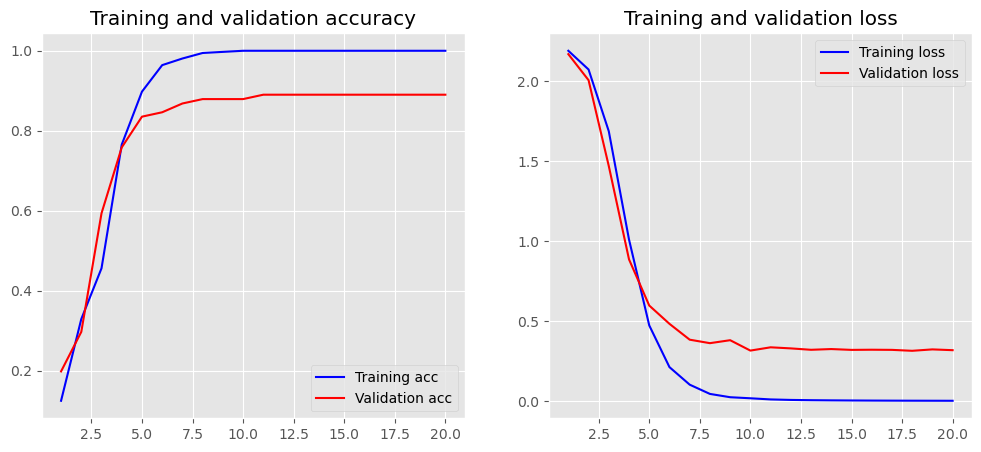

In [49]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.optimizers import Adam

# Create a CNN model
cnn_model = Sequential()
cnn_model.add(Embedding(input_dim=max_vocab + 1, output_dim=300, input_length=max_len_sentence))
cnn_model.add(Conv1D(64, 3, activation='relu'))  # Reduced filter size
cnn_model.add(MaxPooling1D(3))
cnn_model.add(Conv1D(64, 3, activation='relu'))  # Reduced filter size
cnn_model.add(MaxPooling1D(3))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(9, activation="softmax"))

# Compile the model
cnn_model.compile(optimizer=Adam(learning_rate=0.00091), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_cnn = cnn_model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=16, epochs=20, verbose=1)

y_predict = cnn_model.predict(x_test)
print(cnn_model.evaluate(x_test, y_test, verbose=1))
y_predict = np.argmax(y_predict, axis=1)
cm = confusion_matrix(np.argmax(y_test, axis=1), y_predict)
report = classification_report(np.argmax(y_test, axis=1), y_predict)
print("Confusion Matrix:")
plot_confusion_metrix(cm)

print("\nClassification Report:")
print(report)

plot_history(history_cnn)

# RNN

Epoch 1/150
23/23 [==============================] - 2s 33ms/step - loss: 2.2029 - accuracy: 0.0939 - val_loss: 2.2020 - val_accuracy: 0.0879
Epoch 2/150
23/23 [==============================] - 0s 19ms/step - loss: 2.1973 - accuracy: 0.0994 - val_loss: 2.2036 - val_accuracy: 0.1209
Epoch 3/150
23/23 [==============================] - 0s 19ms/step - loss: 2.1152 - accuracy: 0.1464 - val_loss: 1.8519 - val_accuracy: 0.2088
Epoch 4/150
23/23 [==============================] - 0s 20ms/step - loss: 2.0079 - accuracy: 0.1989 - val_loss: 1.7916 - val_accuracy: 0.1978
Epoch 5/150
23/23 [==============================] - 0s 19ms/step - loss: 1.9281 - accuracy: 0.2155 - val_loss: 2.0564 - val_accuracy: 0.2198
Epoch 6/150
23/23 [==============================] - 0s 17ms/step - loss: 1.8694 - accuracy: 0.2099 - val_loss: 1.7275 - val_accuracy: 0.1868
Epoch 7/150
23/23 [==============================] - 0s 18ms/step - loss: 1.7966 - accuracy: 0.1906 - val_loss: 1.7097 - val_accuracy: 0.1868
Epoch 

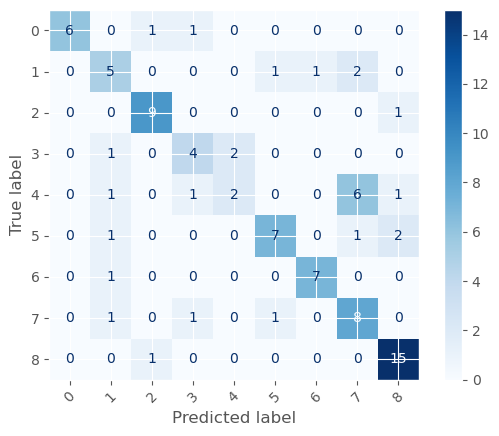


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       0.50      0.56      0.53         9
           2       0.82      0.90      0.86        10
           3       0.57      0.57      0.57         7
           4       0.50      0.18      0.27        11
           5       0.78      0.64      0.70        11
           6       0.88      0.88      0.88         8
           7       0.47      0.73      0.57        11
           8       0.79      0.94      0.86        16

    accuracy                           0.69        91
   macro avg       0.70      0.68      0.68        91
weighted avg       0.70      0.69      0.68        91



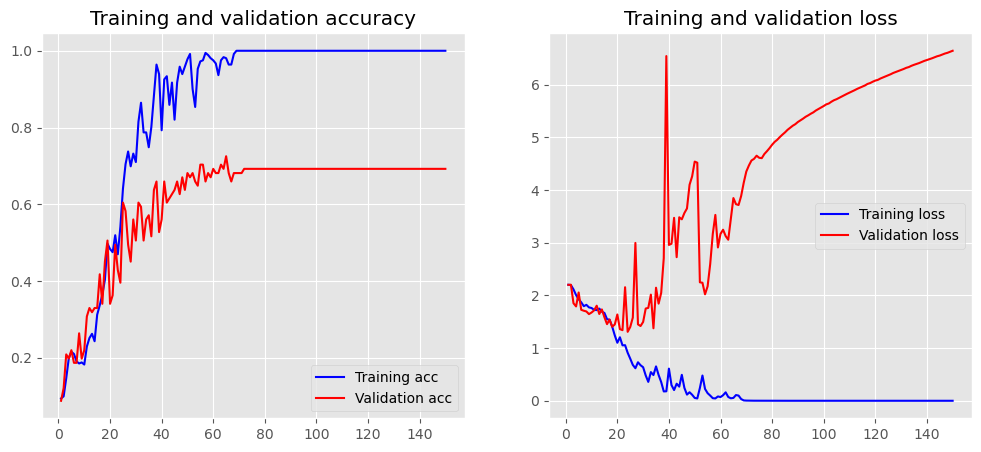

In [55]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, Dropout
from keras.optimizers import Adam

# Create a Simple RNN model
rnn_model = Sequential()
rnn_model.add(Embedding(input_dim=max_vocab + 1, output_dim=300, input_length=max_len_sentence))
rnn_model.add(SimpleRNN(128, activation='relu'))
rnn_model.add(Dense(9, activation="softmax"))

# Compile the model
rnn_model.compile(optimizer=Adam(learning_rate=0.00091), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_rnn = rnn_model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=16, epochs=150, verbose=1)

y_predict = rnn_model.predict(x_test)
print(rnn_model.evaluate(x_test, y_test, verbose=1))
y_predict = np.argmax(y_predict, axis=1)
cm = confusion_matrix(np.argmax(y_test, axis=1), y_predict)
report = classification_report(np.argmax(y_test, axis=1), y_predict)
print("Confusion Matrix:")
plot_confusion_metrix(cm)

print("\nClassification Report:")
print(report)

plot_history(history_rnn)